# Gene-Expression Differences in Peripheral Blood Between Lithium Responders and non-Responders in the Lithium Treatment-Moderate Dose Use Study

## Secção 3 - Modelos de Aprendizagem Máquina

Importar bibliotecas

In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

# Importar métricas
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, ConfusionMatrixDisplay
%matplotlib inline
import matplotlib.pyplot as plt

Reduzir a dimensionalidade dos dados antes de aplicar modelos de *Machine Learning* é crucial por diversos motivos, explicitados na secção anterior. 

Desta forma, procede-se ao carregamento dos dados resultantes da Secção 2:

In [2]:
# Carregar dados usando a lib pandas
dados = pd.read_csv("data_variance.csv", sep=',', index_col = 0)
meta = pd.read_csv("meta_dados.csv", sep=',', index_col = 0)

## Pre-processamento de Dados

Como referido na Secção 2, é essencial realizar o pre-processamento de dados previamente à aplicação de modelos de aprendizagem automática.

In [3]:
pre_data = preprocessing.scale(dados.values)
data = pd.DataFrame(pre_data)

## Aprendizagem Supervisionada

A aprendizagem supervisionada consiste num paradigma de Machine Learning no qual um modelo é treinado a partir de um conjunto de dados composto por entradas associadas a saídas correspondentes. Por outas palavras, o modelo conhece a resposta correta para cada situação. Desta forma, durante o processo de aprendizagem, o algoritmo utiliza estes pares input-output para adquirir a relação entre as características das entradas e saídas, de modo a tornar o modelo capaz de generalizar esse conhecimento para novos dados, para os quais as saídas ainda não são conhecidas. Para além disso, na aprendizagem supervisionada, consoante a natureza da  variável *target*, os problemas podem ser classificados em: Problema de Regressão, quando a variável de saída é contínua e quantitaTiva ou Problema de Classificação, quando o *target* é uma variável discreta. 


Consoante o caso em estudo, pretende-se estabeler o impacto da administração do tratamento com lítio na expressão genética dos pacientes com perturbação bipolar. Assim sendo, é possível inferir que o *target* será a variavél de metadados *other*, que identifica se um invidíviduo apresentou (*responder*) ou não (*non-responder*) resposta ao tratamento. Desta forma, trata-se de um problema de classificação supervisionada com o intuito de, futuramente, prever a resposta de um indivíduo ao tratamento com lítio, através dos dados de expressão genética do mesmo. 

#### "other" - prever a resposta de um indivíduo ao tratamento com lítio

In [4]:
target = meta['other']
target.value_counts() 

other
non-responder    94
responder        26
Name: count, dtype: int64

### Partição de Dados: Dados de treino + Dados de Teste

Antes da etapa de modelação, é necessário efetuar a partição de dados, essencial para avaliar e validar o desempenho dos modelos de *machine learning*. Efetuou-se, então, uma divisão de dados em conjuntos de treino e teste, segundo uma partição de 70% para dados de treino e, consequentemente, 30% para dados de teste, utilizados posteriormente para avaliar, de forma imparcial, o modelo final


In [5]:
data_X_train, data_X_test, data_y_train, data_y_test = train_test_split(data, target, test_size=0.3, random_state=1)

print(data_X_train.shape)
print(data_X_test.shape)

(84, 4389)
(36, 4389)


In [11]:
data_X_train.head()

,0,1,2,3,4,5,6,7,8,9,...,4379,4380,4381,4382,4383,4384,4385,4386,4387,4388
32,-0.308872,-1.619179,0.962161,3.456257,0.570346,-1.416950,1.091268,-0.381421,2.373272,-0.443078,...,2.208687,-0.082232,-2.349454,3.214648,2.003678,2.267581,-1.619393,3.189826,1.349990,1.816694
80,-0.315546,1.622935,-0.574471,0.359877,-0.569169,0.585787,-0.550100,-0.103353,-0.214445,1.287577,...,-0.033460,1.197185,1.425763,0.127306,0.094305,0.267065,-2.078049,-0.748956,1.340576,0.462012
38,0.233501,0.607146,0.144577,-0.417640,-0.523243,0.513037,-0.683299,-1.905527,-0.450041,0.280021,...,-1.438983,0.130853,1.321394,-0.927196,-0.741116,-1.335398,0.763644,-0.896036,0.185750,-1.123842
19,-0.604059,-0.863206,0.629619,2.758344,1.647377,-0.460103,0.033938,-1.526956,0.572523,-0.289798,...,1.180523,-1.958676,0.239979,-0.049924,-2.361368,-0.342026,0.880196,-0.346159,-1.015477,-1.240972
119,-1.065833,-0.014639,4.135359,2.915627,-0.866247,2.857641,-2.819401,1.047625,-1.690900,1.768072,...,0.967768,-0.769184,0.559170,-0.564163,-2.148001,0.183015,1.156169,-0.636403,0.885303,-2.350512


Após a partição, revela-se necessário verificar a distribuição do target nos conjuntos de treino e teste, de modo a ser possível inferir sobre o impacto nos resultados futuros. Na verdade, uma distribuição desigual pode introduzir alguma distorção e afetar a capacidade de previsão do modelo para novos dados, resultando num desempenho inadequado que culmina em previsões menos precisas para as classes de interesse. 

other
non-responder    69
responder        15
Name: count, dtype: int64


<Axes: ylabel='count'>

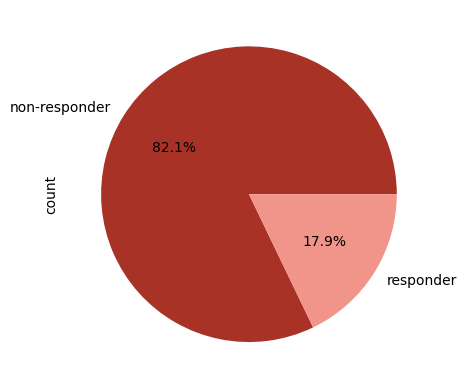

In [12]:
#verificar se a distribuição do target é a mesma no treino e teste
counts_train = data_y_train.value_counts()
print(counts_train)

counts_train.plot.pie(autopct='%1.1f%%', colors =['#A93226', '#F1948A'])


other
non-responder    25
responder        11
Name: count, dtype: int64


<Axes: ylabel='count'>

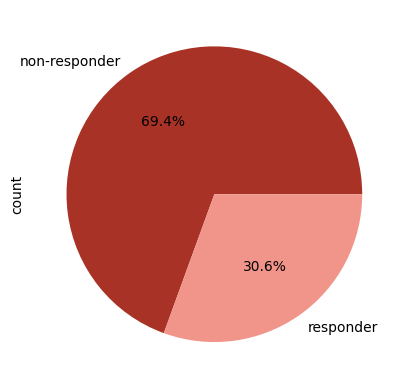

In [13]:
counts_test = data_y_test.value_counts()
print(counts_test)

counts_test.plot.pie(autopct='%1.1f%%', colors =['#A93226', '#F1948A'])

Assim, através do plot destes gráficos de setores, é possível concluir que a distribuição do target não é semelhante nos conjuntos de treino e teste, sendo indicativo que o modelo pode apresentar alguma dificuldade na capacidade de efetuar previsões confiáveis, uma vez que o processo de treino é efetuado com um rácio superior de indivíduos que não responderam face aos que responderam ao tratamento.

Para além disso,oberva-se uma distribuição correspondente a um conjunto de dados desbalanceado, uma vez que a classe *non-responder* é representada por uma proporção muito maior que a classe *responder*.Ainda, como uma das classes contém mais de 80% dos dados, não se pode aferir que um modelo com uma *accuracy*de 80% seja particularmente bom. Assim, é importante avaliar o desempenho dos modelos segundo outras métricas, de que são exemplo *precision*, *recall*, de modo a obter uma avaliação mais confiável do desempenho dos modelos. 


## Aplicação de Modelos Supervisionados de Machine Learning e Avaliação dos Modelos

Como mencionado anteriormente, o caso em estudo trata-se de um problema de classificação, o que restringe os modelos de ML disponíveis para a sua modelação. Com efeito, por entre os vários modelos estudados, serão aplicados, de seguida, 5 algoritmos de Aprendizagem Máquina: Árvore de Decisão, Regressão Logística, SVM, Naive-Bayes e KNN, com o intuito de comparar o seu comportamento no conjunto de dados.Assim, tem-se como objetivo determinar qual o algoritmo que melhor se adapta ao contexto da classificação desejada. Na execução dos referidos modelos, estes serão criados com o respetivo construtor, treinados segundo a função *fit* e, posteriormente, utilizados para fazer as previsões segundo a função *predict*.



Importante referir que a etapa de padronização dos dados é uma etapa essencial na preparação dos dados, devendo ser realizada antes da aplicação destes modelos. O mesmo se encontra verificado, uma vez que esta etapa foi executada nas secções anteriores.




Relativamente à Avaliação dos Modelos, consiste num processo que mede o desempenho e eficácia dos algoritmos aplicados a dados de teste, ou seja, a dados não vistos durante o processo de treino. Existem várias métricas de avaliação frequentemente utilizadas, dependendo da natureza do problema: Regressão ou Classificação. Visto se tratar de um problema de classificação, o desempenho dos modelos será avalidado consoante as seguintes métricas de erro: 

- Matriz de Confusão:Tabela que compara as previsões do modelo com os valores reais do conjunto de teste, apresentando o número de verdadeiros positivos (TP), verdadeiros negativos (TN), falsos positivos (FP) e falsos negativos (FN). A partir desta é possível determinar:  

        - Accuracy: Proporção de previsões corretas em relação ao total de previões;  

        - Precision: Razão entre os verdadeiros positivos e o total de instâncias previstas como positivas;  

        - Recall(Sensibilidade): Proporção entre os verdadeiros positivos e o total de instâncias positivas no conjunto de dados.  
        
        - F1-Score: Combina precisão e recall num único valor de avaliação dos modelos. É utilizada em problemas de classificação desbalanceados, onde uma classe apresenta mais prevalência do que a outra e é particularmente útil em situações em que tanto falsos positivos quanto falsos negativos são importantes.
        
    
- Área sob a Curva ROC (AUC): A curva ROC representa graficamente a relação entre a taxa de verdadeios positivos e a taxa de falsos positvos, sendo a área sob essa curva uma medida da capacidade de distinção entre classes do modelo, variando entre 0 e 1, onde um valor maior indica um melhor desempenho. 

Uma análise conjunta das várias métricas de desempenho possibilita uma melhor compreensão e, consequente, avaliação mais detalhada do desempenho do modelo.


### Árvore de Decisão

Um Modelo de Árvore de Decisão é um algoritmo de ML que consiste num grafo hierarquizado, onde cada nó especifica um teste para o valor de uma determinada *feature* de entrada e cada ramo representa o resultado dessa decisão. As folhas da árvore contêm as previsões finais do valor para o atributo de saída. 


In [6]:
# Criação do Modelo
from sklearn import tree

tree_model = tree.DecisionTreeClassifier()
tree_model.fit(data_X_train, data_y_train)

tree_y_pred = tree_model.predict(data_X_test)

Accuracy: 0.78
Precision: 0.77
Recall: 0.78
F1-score: 0.76


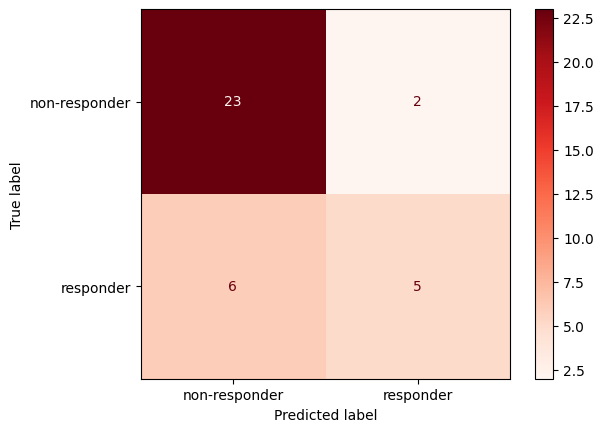

In [7]:
# Avaliação Modelo: Matriz de Confusão
tree_cm = ConfusionMatrixDisplay.from_predictions(data_y_test, tree_y_pred, display_labels=tree_model.classes_, cmap='Reds')
tree_cm

print('Accuracy: %0.2f' % tree_model.score(data_X_test, data_y_test))
print('Precision: %0.2f' % precision_score(data_y_test, tree_y_pred, average='weighted'))
print('Recall: %0.2f' % recall_score(data_y_test, tree_y_pred, average='weighted'))
print('F1-score: %0.2f' % f1_score(data_y_test, tree_y_pred, average='weighted'))

O modelo apresenta uma percentagem: *accuracy* = 78%, o que indica que é capaz de prever corretamente 78% dos casos; *precision* = 77%, que evidencia a boa capacidade do modelo de evitar a classificação incorreta de casos negativos (*non-responder*) como positivos (*responder*); *recall* = 78%, o que é indicador de uma boa sensibilidade em identificar os casos positivos e, ainda, *f1-score* = 76%, que sugere um bom equilíbro ente a precisão e sensibilidade do modelo. Previu corretamente a ausência de resposta em 23 dos casos e obtenção de resposta ao tratamento em 5 dos casos. 

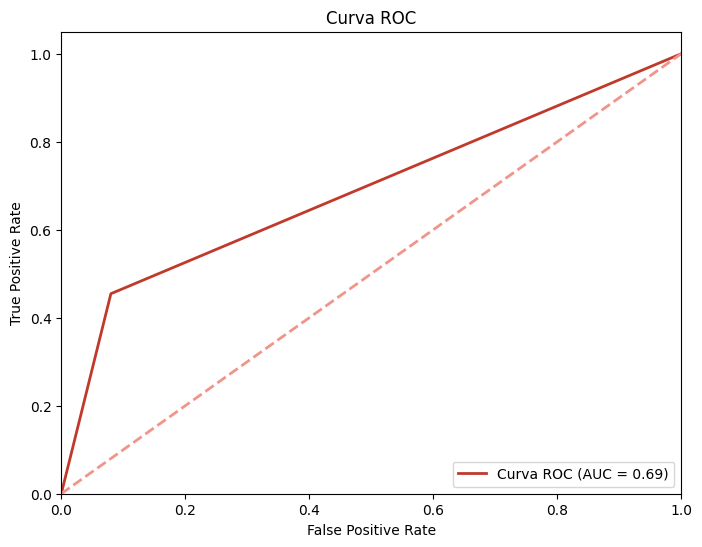

In [8]:
# Avaliação Modelo: Curva ROC
from sklearn.metrics import roc_curve, auc

# Especificar explicitamente qual a classe positiva
pos_label = 'responder'
tree_y_probs = tree_model.predict_proba(data_X_test)[:, 1]

# Calcular a curva ROC
fpr, tpr, thresholds = roc_curve(data_y_test, tree_y_probs, pos_label=pos_label)
roc_auc = auc(fpr, tpr)

# Desenhar a curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='#C0392B', lw=2, label='Curva ROC (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='#F1948A' , lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()



Uma AUC de 0.69 (superior a 0.5) demonstra a capacidade moderada do modelo de distinguir entre as classes responder e non-responder, sugerindo uma performance do modelo superior a uma escolha aleatória. 

### Regressão Logística

Um modelo de Regressão Logística é um modelo estatístico utilizado para problemas de classificação binária. Assim, prevê a probabilidade de um atributo pertencer a uma classe específica, com auxílio de uma curva logística. 


In [9]:
# Criação do Modelo
from sklearn import linear_model

logistic = linear_model.LogisticRegression(C=1e5, solver = "liblinear", multi_class = "auto")
logistic.fit(data_X_train, data_y_train)

logistic_y_pred = logistic.predict(data_X_test)

Accuracy: 0.56
Precision: 0.82
Recall: 0.56
F1-score: 0.76


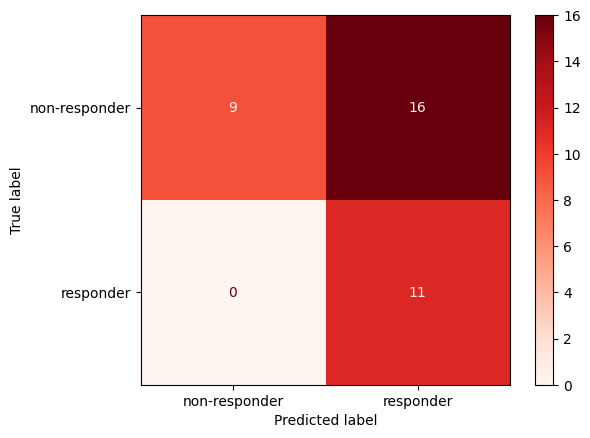

In [10]:
# Avaliação Modelo: Matriz de Confusão
logistic_cm = ConfusionMatrixDisplay.from_predictions(data_y_test, logistic_y_pred, display_labels=logistic.classes_, cmap='Reds')
logistic_cm

print('Accuracy: %0.2f' % logistic.score(data_X_test, data_y_test))
print('Precision: %0.2f' % precision_score(data_y_test, logistic_y_pred, average='weighted'))
print('Recall: %0.2f' % recall_score(data_y_test, logistic_y_pred, average='weighted'))
print('F1-score: %0.2f' % f1_score(data_y_test, tree_y_pred, average='weighted'))

O modelo apresenta uma percentagem: *accuracy* = 56%, o que indica que é capaz de prever corretamente 56% dos casos; *precision* = 82%, que evidencia a boa capacidade do modelo de evitar a classificação incorreta de casos negativos (*non-responder*) como positivos (*responder*); *recall* = 56%, o que é indicador de uma boa sensibilidade em identificar os casos positivos e, ainda, *f1-score* = 76%, que sugere  equilíbro entre a precisão e sensibilidade do modelo, podendo ser influenciado pelo desequilíbrio na distribuição das classes.
Previu corretamente a ausência de resposta em 9 dos casos e obtenção de resposta ao tratamento em 11 dos casos. 

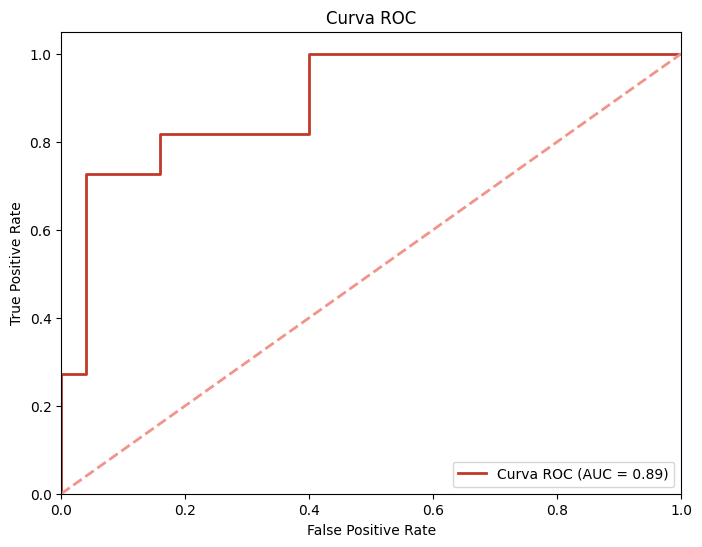

In [11]:
# Avaliação Modelo: Curva ROC

pos_label = 'responder'
lr_y_probs = logistic.predict_proba(data_X_test)[:, 1]

# Calcular a curva ROC
fpr, tpr, thresholds = roc_curve(data_y_test, lr_y_probs, pos_label=pos_label)
roc_auc = auc(fpr, tpr)

# Desenhar a curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='#C0392B', lw=2, label='Curva ROC (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='#F1948A' , lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()


Uma AUC de 0.89 demonstra uma capacidade do modelo de distinguir entre as classes responder e non-responder superior a um modelo aleatório (AUC=0.5).

### SVM

Um modelo SVM (Support Vector Machine) é um algoritmo de ML que, num contexto de classificação, possui como objetivo encontrar o hiperplano ideal que melhor separa os dados em diferentes classes no espaço multidimensional. A escolha desse hiperplano recai sobre o que maximiza a margem, isto é, a distância entre os vetores de suporte e o hiperplano. 



In [12]:
# Criação do Modelo
from sklearn.svm import SVC
from sklearn import svm

svm_model = SVC(kernel="linear", probability=True)
svm_model.fit(data_X_train, data_y_train)

svm_y_pred = svm_model.predict(data_X_test)

Accuracy: 0.83
Precision: 0.87
Recall: 0.83
F1-score: 0.76


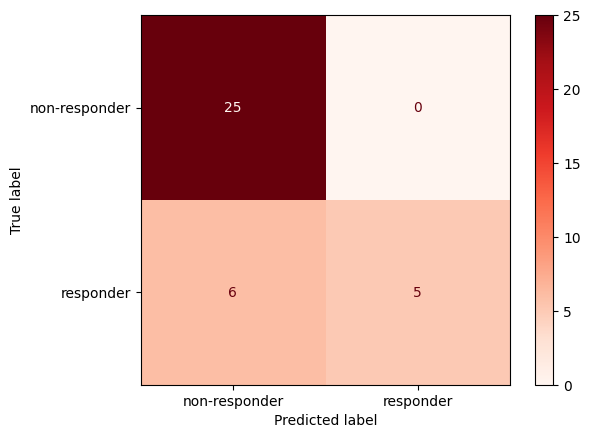

In [13]:
# Avaliação Modelo: Matriz de Confusão
svm_cm = ConfusionMatrixDisplay.from_predictions(data_y_test, svm_y_pred, display_labels=svm_model.classes_, cmap='Reds')
svm_cm

print('Accuracy: %0.2f' % svm_model.score(data_X_test, data_y_test))
print('Precision: %0.2f' % precision_score(data_y_test, svm_y_pred, average='weighted'))
print('Recall: %0.2f' % recall_score(data_y_test, svm_y_pred, average='weighted'))
print('F1-score: %0.2f' % f1_score(data_y_test, tree_y_pred, average='weighted'))

O modelo apresenta uma percentagem: *accuracy* = 83%, o que indica que é capaz de prever corretamente 83% dos casos; *precision* = 87%, que evidencia a boa capacidade do modelo de evitar a classificação incorreta de casos negativos (*non-responder*) como positivos (*responder*); *recall* = 83%, o que é indicador de uma boa sensibilidade em identificar os casos positivos e, ainda, *f1-score* = 76%, que sugere equilíbro ente a precisão e sensibilidade do modelo, podendo ser influenciado pelo desequilíbrio na distribuição das classes.
Previu corretamente a ausência de resposta em 25 dos casos e obtenção de resposta ao tratamento em 5 dos casos.

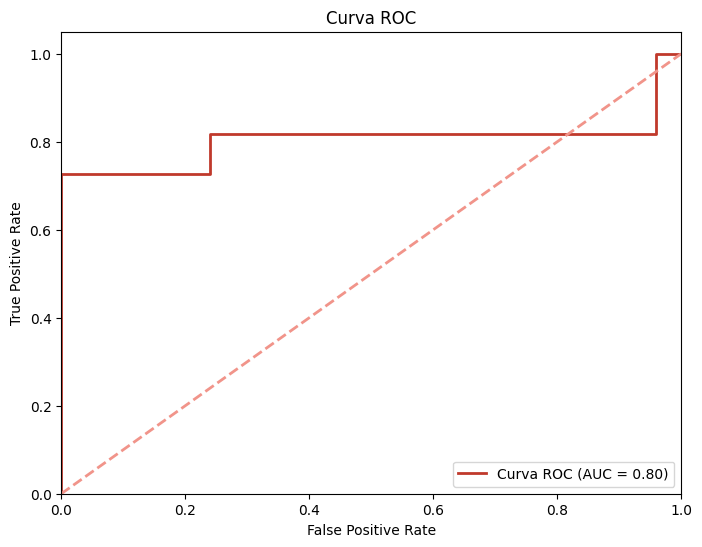

In [14]:
# Avaliação Modelo: Curva ROC

pos_label = 'responder'
svm_y_probs = svm_model.predict_proba(data_X_test)[:, 1]

# Calcular a curva ROC
fpr, tpr, thresholds = roc_curve(data_y_test, svm_y_probs, pos_label=pos_label)
roc_auc = auc(fpr, tpr)

# Desenhar a curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='#C0392B', lw=2, label='Curva ROC (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='#F1948A' , lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()

Uma AUC de 0.80 demonstra uma capacidade do modelo de distinguir entre as classes responder e non-responder superior a um modelo aleatório (AUC=0.5).

### KNN

O modelo KNN (K-Nearest Neighbors) é um algoritmo de aprendizagem supervisionada, cuja ideia central reside na classificar ou prever um novo ponto de dados com base na maioria dos "k" pontos de dados mais próximos a ele no espaço de características. A distância entre pontos é geralmente medida usando métricas como distância euclidiana, distância de Manhattan, distância de Minkowski, entre outras.

In [15]:
# Criação do Modelo
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

# Certifique-se de que 'data_X_train' e 'data_y_train' estão em ordem contígua

data = np.ascontiguousarray(data)
target = np.ascontiguousarray(target)

knn_model = KNeighborsClassifier()
knn_model.fit(data_X_train, data_y_train)

# Certifique-se de que 'data_X_test' está em ordem contígua
data_X_test = np.ascontiguousarray(data_X_test)


knn_y_pred = knn_model.predict(data_X_test)

Accuracy: 0.72
Precision: 0.80
Recall: 0.72
F1-score: 0.76


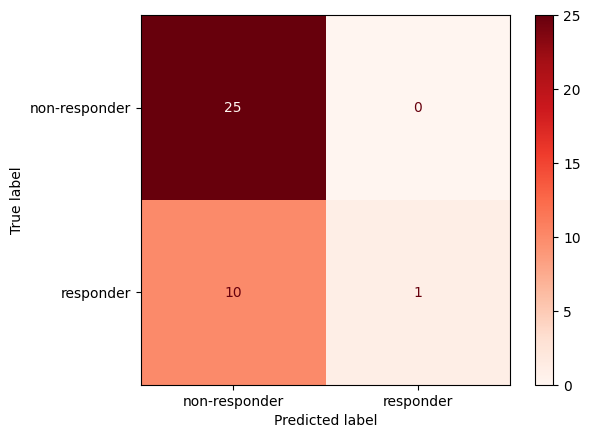

In [16]:
# Avaliação Modelo: Matriz de Confusão
knn_cm = ConfusionMatrixDisplay.from_predictions(data_y_test, knn_y_pred, display_labels=knn_model.classes_, cmap='Reds')
knn_cm

print('Accuracy: %0.2f' % knn_model.score(data_X_test, data_y_test))
print('Precision: %0.2f' % precision_score(data_y_test, knn_y_pred, average='weighted'))
print('Recall: %0.2f' % recall_score(data_y_test, knn_y_pred, average='weighted'))
print('F1-score: %0.2f' % f1_score(data_y_test, tree_y_pred, average='weighted'))

O modelo apresenta uma percentagem: *accuracy* = 72%, o que indica que é capaz de prever corretamente 72% dos casos; *precision* = 80%, que evidencia a boa capacidade do modelo de evitar a classificação incorreta de casos negativos (*non-responder*) como positivos (*responder*); *recall* = 72%, o que é indicador de uma boa sensibilidade em identificar os casos positivos e, ainda, *f1-score* = 76%, que sugere equilíbro ente a precisão e sensibilidade do modelo, podendo ser influenciado pelo desequilíbrio na distribuição das classes.
Previu corretamente a ausência de resposta em 25 dos casos e obtenção de resposta ao tratamento em apenas 1 dos casos.

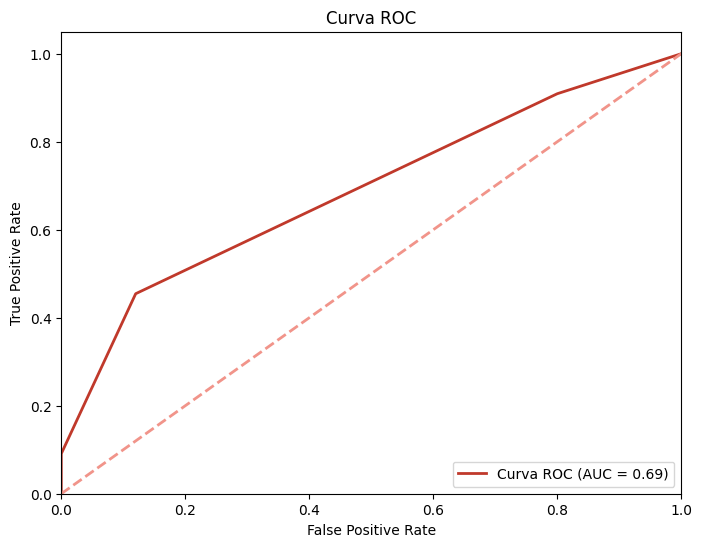

In [17]:
# Avaliação Modelo: Curva ROC
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

pos_label = 'responder'
knn_y_probs = knn_model.predict_proba(data_X_test)[:, 1]

# Calcular a curva ROC
fpr, tpr, thresholds = roc_curve(data_y_test, knn_y_probs, pos_label=pos_label)
roc_auc = auc(fpr, tpr)

# Desenhar a curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='#C0392B', lw=2, label='Curva ROC (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='#F1948A' , lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()

A obtenção de uma AUC de 0,69 demonstra uma capacidade do modelo distinguir entre as classes responder e non-responder superior a um modelo aleatório (AUC=0,5).

### Naive Bayes

O modelo de Naive Bayes é um algoritmo de aprendizagem supervisionada baseado no Teorema de Bayes.

In [18]:
# Criação do Modelo
from sklearn.naive_bayes import GaussianNB

nb_model = GaussianNB()
nb_model.fit(data_X_train, data_y_train)

nb_y_pred = nb_model.predict(data_X_test)

Accuracy: 0.86
Precision: 0.88
Recall: 0.86
F1-score: 0.76


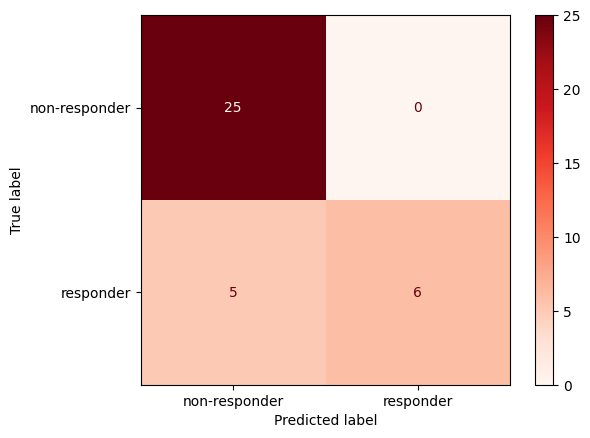

In [19]:
# Avaliação Modelo: Matriz de Confusão
nb_cm = ConfusionMatrixDisplay.from_predictions(data_y_test, nb_y_pred, display_labels=nb_model.classes_, cmap='Reds')
knn_cm

print('Accuracy: %0.2f' % nb_model.score(data_X_test, data_y_test))
print('Precision: %0.2f' % precision_score(data_y_test, nb_y_pred, average='weighted'))
print('Recall: %0.2f' % recall_score(data_y_test, nb_y_pred, average='weighted'))
print('F1-score: %0.2f' % f1_score(data_y_test, tree_y_pred, average='weighted'))

O modelo apresenta uma percentagem: *accuracy* = 86%, o que indica que é capaz de prever corretamente 86% dos casos; *precision* = 88%, que evidencia a boa capacidade do modelo de evitar a classificação incorreta de casos negativos (*non-responder*) como positivos (*responder*); *recall* = 86%, o que é indicador de uma boa sensibilidade em identificar os casos positivos e, ainda, *f1-score* = 76%, que sugere equilíbro ente a precisão e sensibilidade do modelo, podendo ser influenciado pelo desequilíbrio na distribuição das classes.
Previu corretamente a ausência de resposta em 25 dos casos e obtenção de resposta ao tratamento em 6 dos casos.

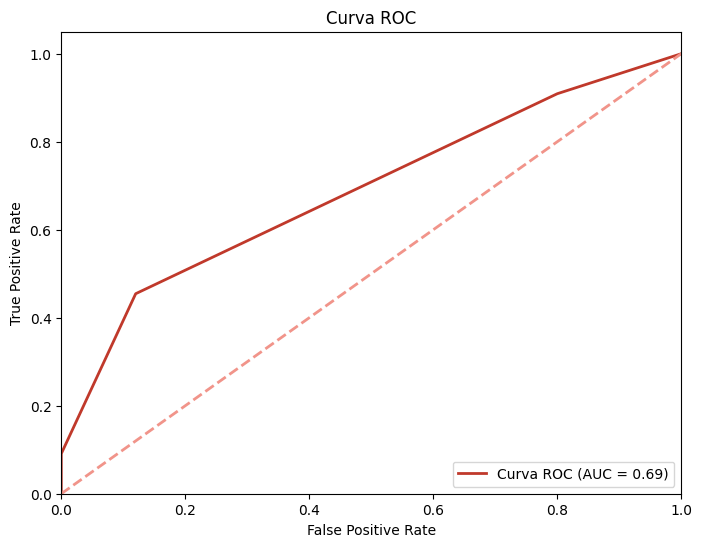

In [20]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

binary_y_true = (data_y_test == 'responder').astype(int)
nb_y_prob = nb_model.predict_proba(data_X_test)[:, 1]

# Calculando a curva ROC
fpr_nb, tpr_nb, thresholds_nb = roc_curve(binary_y_true, nb_y_prob)
roc_auc_nb = auc(fpr_nb, tpr_nb)


# Desenhar a curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='#C0392B', lw=2, label='Curva ROC (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='#F1948A' , lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()

A obtenção de uma AUC de 0,69 demonstra uma capacidade do modelo distinguir entre as classes responder e non-responder superior a um modelo aleatório (AUC=0,5).

##  Métodos Estimação do Erro

### Cross validation

A validação cruzada é um processo de validação que divide o conjunto de dados em k *folds* mutuamente exclusivos, onde o modelo é treinado k vezes, usando k-1 partes para treino e a parte restante para teste. Este procedimento é repetido várias vezes, cada vez com uma combinação diferente de partes como conjunto de teste e treino, de forma a garantir que utiliza todos os dados. No final de todas as iterações, calcula-se a *accuracy*, obtendo-se, assim, uma medida mais confiável sobre a capacidade de previsão do modelo em questão. 

In [21]:
from sklearn.model_selection import cross_val_score

In [22]:
# Árvore Decisão
scores_tree_cv = cross_val_score(estimator=tree_model, X=data, y=target, cv = 5) # 5 folds

print('Accuracy values:', scores_tree_cv)     
print('Mean accuracy: %0.2f' % scores_tree_cv.mean())

Accuracy values: [0.875      0.875      0.875      0.79166667 0.83333333]
Mean accuracy: 0.85


O modelo apresenta uma *accuracy* média de 85%, o que indica que a Árvore de Decisão é capaz de prever corretamente em 85% dos casos. Neste caso já não se verificam diferenças significativas entre os valores de *accuracy* dos diferentes *folds*, sendo esta consistência indicadora de um desempenho mais estável e robusto do modelo, nas diferentes divisões dos dados. 

In [23]:
# Regressão Logística
scores_lr_cv = cross_val_score(estimator=logistic, X=data, y=target, cv = 5) # 5 folds

print('Accuracy values:', scores_lr_cv)    
print('Mean accuracy: %0.2f' % scores_lr_cv.mean())

Accuracy values: [0.41666667 0.25       0.45833333 0.41666667 0.29166667]
Mean accuracy: 0.37


O modelo apresenta uma *accuracy* média de 37%, o que indica que a Regressão Logística é capaz de prever corretamente em 37% dos casos. Também, verifica-se alguma variação entre os valores de *accuracy* das diferentes *folds*, o que pode ser indicativo da sensibilidade do modelo à forma como os dados são divididos, apresentando o modelo mais sensibilidade a diferentes partições dos dados. 

In [24]:
# SVM
scores_svm_cv = cross_val_score(estimator=svm_model, X=data, y=target, cv = 5) # 5 folds

print('Accuracy values:', scores_svm_cv)     #Aqui ja não calula r2 e sim a accuracy para cada fold
print('Mean accuracy: %0.2f' % scores_svm_cv.mean())

Accuracy values: [0.83333333 0.95833333 1.         0.91666667 0.95833333]
Mean accuracy: 0.93


O modelo apresenta uma *accuracy* média de 93%, o que indica que o modelo SVM é capaz de prever corretamente em 93% dos casos. Mais uma vez, não se verificam diferenças significativas entre os valores de *accuracy* dos diferentes *folds*, sendo esta consistência indicadora de um desempenho mais estável e robusto do modelo, perante diferentes divisões dos dados. 

In [25]:
# KNN
scores_knn_cv = cross_val_score(estimator=knn_model, X=data, y=target, cv=5)


print('Accuracy values:', scores_knn_cv)     
print('Mean accuracy: %0.2f' % scores_knn_cv.mean())

Accuracy values: [0.875      0.83333333 0.83333333 0.79166667 0.75      ]
Mean accuracy: 0.82


O modelo apresenta uma accuracy média de 82%, o que indica que o modelo KNN é capaz de prever corretamente em 82% dos casos. É possível constatar que não existem diferenças significativas entre os valores de accuracy dos diferentes folds, sendo tal indicador de um desempenho mais estável e robusto do modelo, perante diferentes divisões dos dados.

In [26]:
# NB
scores_nb_cv = cross_val_score(estimator=nb_model, X=data, y=target, cv = 5) # 5 folds

print('Accuracy values:', scores_nb_cv)     
print('Mean accuracy: %0.2f' % scores_nb_cv.mean())

Accuracy values: [0.875      0.875      0.83333333 0.66666667 0.83333333]
Mean accuracy: 0.82


O modelo apresenta uma accuracy média de 82%, o que indica que o modelo de Naive Bayes é capaz de prever corretamente em 82% dos casos. É possível constatar que não existem diferenças significativas entre os valores de accuracy dos diferentes folds, sendo tal indicador de um desempenho mais estável e robusto do modelo, perante diferentes divisões dos dados.

## Avaliação dos Modelos ML

### Avaliação dos Modelos ML por accuracy

In [27]:
def model_evaluation(data_y_test, tree_y_pred,logistic_y_pred, svm_y_pred, nb_y_pred, knn_y_pred):
    print("\nPercentagem de exemplos corretamente previstos:")
    print("Decision Tree: %0.2f" % accuracy_score(data_y_test,tree_y_pred))
    print("Regressão Logística: %0.2f" % accuracy_score(data_y_test, logistic_y_pred))
    print("SVMs: %0.2f" % accuracy_score(data_y_test, svm_y_pred))
    print("KNeighbors: %0.2f" % accuracy_score(data_y_test, knn_y_pred))
    print("Naive Bayes: %0.2f" % accuracy_score(data_y_test, nb_y_pred))
    
model_evaluation(data_y_test, tree_y_pred,logistic_y_pred, svm_y_pred, nb_y_pred, knn_y_pred)


Percentagem de exemplos corretamente previstos:
Decision Tree: 0.78
Regressão Logística: 0.56
SVMs: 0.83
KNeighbors: 0.72
Naive Bayes: 0.86


Avaliando conjuntamente os modelos de machine learning desenvolvidos, tendo em conta o score de accuracy, é possível concluir que os modelos de SVM e Naive Bayes apresentam um valor de accuracy superior, permitindo aferir que estes são capazes de prever corretamente 83% e 86% dos casos de teste, respetivamente. Além do mais, o modelo de Regressão Logística apresenta o menor valor de accuracy, 56%, entre os modelos desenvolvidos. 

### Avaliação dos Modelos ML por cross-validation

In [28]:
def model_evaluation_crossval(scores_tree_cv, scores_lr_cv, scores_svm_cv, scores_knn_cv, scores_nb_cv):
    print("\nAccuracy média:")
    print("Decision Tree: %0.2f" % scores_tree_cv.mean())
    print("Regressão Logística: %0.2f" % scores_lr_cv.mean())
    print("SVMs: %0.2f" % scores_svm_cv.mean())
    print("KNeighbors: %0.2f" % scores_knn_cv.mean())
    print("Naive Bayes: %0.2f" % scores_nb_cv.mean())

model_evaluation_crossval(scores_tree_cv, scores_lr_cv, scores_svm_cv, scores_knn_cv, scores_nb_cv)


Accuracy média:
Decision Tree: 0.85
Regressão Logística: 0.37
SVMs: 0.93
KNeighbors: 0.82
Naive Bayes: 0.82


Avaliando conjuntamente os modelos de machine learning desenvolvidos, tendo em conta a accuracy média obtida durante a cross-validation, é possível concluir que os modelos de Árvore de Decisão e SVM apresentam um valor de accuracy média superior, permitindo aferir que estes são capazes de prever corretamente 84% e 93% dos casos, respetivamente. Os modelos mencionados apresentam, assim, um desempenho médio superior. De facto, estes modelos apresentam um desempenho bastante sólido, em média. Além do mais, o modelo de Regressão Logística apresenta, novamente, o menor valor de accuracy média, 37%, entre os modelos desenvolvidos.

## Ensemble Model

Ideia central da construção de ensemble models reside na obtenção de respostas a situações novas, a partir da combinação das respostas de diferentes modelos. De facto, a construção de ensemble models permite combinar as previsões de vários modelos individuais de modo a obter um desempenho otimizado, relativamente do que o desempenho individual. Assim, usando os diferentes modelos desenvolvidos posibilita o aprimoramento da precisão e da robustez dos resultados. 

### Ensemble Model baseado nos três melhores modelos obtidos

A utilização do Voting Classifier, na construção de um ensemble model, permite combinar vários modelos de aprendizagem supervisionada para tomar decisões por votação. 
Nos modelos desenvolvidos foi considerada a "hard voting", na medida em que as previsões de cada modelo são consideradas no ensemble model, e a classe que recebe a maioria dos votos, dos modelos individuais, é selecionada como a previsão final. 

In [29]:
from sklearn.ensemble import VotingClassifier

vot_model = VotingClassifier(estimators=[('decision', tree_model), ('svm', svm_model), ('knn', knn_model)], voting='hard')

score_vot=cross_val_score(vot_model, X=data, y=target, cv=5).mean()
print("Mean Accuracy: %0.2f" % score_vot)

Mean Accuracy: 0.91


O resultado obtido, perante  construção de um ensemble model baseado nos três melhores modelos obtidos, Árvore de Decisão, SVM e KNN, representa a média da accuracy obtida pelo emsemble model, usando validação cruzada, de 91%. 
Comparando o valor obtido com os valores referentes à média da accuracy de cada modelo individual é possível constatar que o desenvolvimento do ensemble model em questão permitiu aumentar a accuracy, e, portanto, permitirá obter melhores previsões. 

### Voting Classifier

In [30]:
from sklearn.ensemble import VotingClassifier

voting_cls = VotingClassifier(estimators=[('decision_tree', tree_model), ('logistic', logistic), ('svm', svm_model), ('knn', knn_model), ('nb', nb_model)], voting='hard')

for clf, label in zip([tree_model, logistic, svm_model, knn_model, nb_model, voting_cls], ['decision_tree', "logistic", "SVM", "KNN", "NB", 'Ensemble']):
    scores = cross_val_score(clf, X=data, y=target,cv=5)
    print("Accuracy: %0.2f (std %0.2f) [%s]" % (scores.mean(), scores.std(), label))

Accuracy: 0.86 (std 0.02) [decision_tree]
Accuracy: 0.37 (std 0.08) [logistic]
Accuracy: 0.93 (std 0.06) [SVM]
Accuracy: 0.82 (std 0.04) [KNN]
Accuracy: 0.82 (std 0.08) [NB]
Accuracy: 0.88 (std 0.06) [Ensemble]


O código anterior permite a criação de um ensemble model, combinando cinco modelos diferentes. O ciclo for desenvolvido possibilita que seja efetuada validação cruzada para cada modelo individual e para o emsemble model, sendo apresentados os resultados accuracy média e do respetivo desvio padrão. 

Comparando o desempenho do ensemble model com os modelos individuais constata-se que este obteve uma accuracy média de 88%, valor próximo ao dos modelos inividuais mais fortes. Devido aos modelos Regressão Logística e Naive Bayes apresentarem menor accuracy média, a sua incorporação no ensemble model poderá ter contribuído para piorar a robustez geral. 

De realçar, ainda, que os modelos Árvore de Decisão e KNN apresentam menor variância (desvio padrão) de entre os modelos individuais, enfatizando a consistência dos seus resultados. Além disso, o emsemble model também apresenta elevada consistência (desvio padrão - 0.06) indicando menor variância do que os modelos individuais, nomeadamente os modelos Regressão Logística e NB (desvio padrão - 0.08). 

## Conclusões

A escolha de um ensemble model pode ser uma escolha sólida, proporcionando um equilíbrio entre a accuracy e a robustez dos resultados. Tendo em conta as avaliações analisadas, pode-se concluir que o melhor ensemble model a aplicar será o ensemble model baseado nos três melhores modelos obtidos, pois verificou-se para este modelo um accuracy superior, de 91%, comparativamente a todos os outros modelos avaliados.

Com isto, espera-se obter, com este modelo, melhores previsões de exibição de resposta ao tratamento com lítio com base na análise de expressão genética dos pacientes.